In [1]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(".."))

In [2]:
import os
from av2.datasets.sensor.av2_sensor_dataloader import AV2SensorDataLoader
from pathlib import Path
from av2.structures.sweep import Sweep


home = os.path.join(os.path.expanduser('~'), "buni")

dataset_path = Path(os.path.join(home, "dataset", "av2", "train"))

av2 = AV2SensorDataLoader(data_dir=dataset_path, labels_dir=dataset_path)

scene_idx = 0
frame_idx = 0

scene_id = av2.get_log_ids()[scene_idx]
frame_id = av2.get_ordered_log_lidar_timestamps(scene_id)[frame_idx]
frame_path = av2.get_lidar_fpath_at_lidar_timestamp(scene_id, frame_id)

points = Sweep.from_feather(frame_path).xyz

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home = os.path.join(os.path.expanduser('~'), "buni")

ge_path = os.path.join(home, "output-data", "av2", "test_ge_script")

scene_idx = 0
frame_idx = 0

scene_id = os.listdir(ge_path)[scene_idx]
scene_path = os.path.join(ge_path, scene_id)

frame_id = os.listdir(scene_path)[frame_idx]
frame_path = os.path.join(ge_path, scene_id, frame_id)


In [4]:
non_ground_points = pd.read_feather(frame_path).to_numpy()

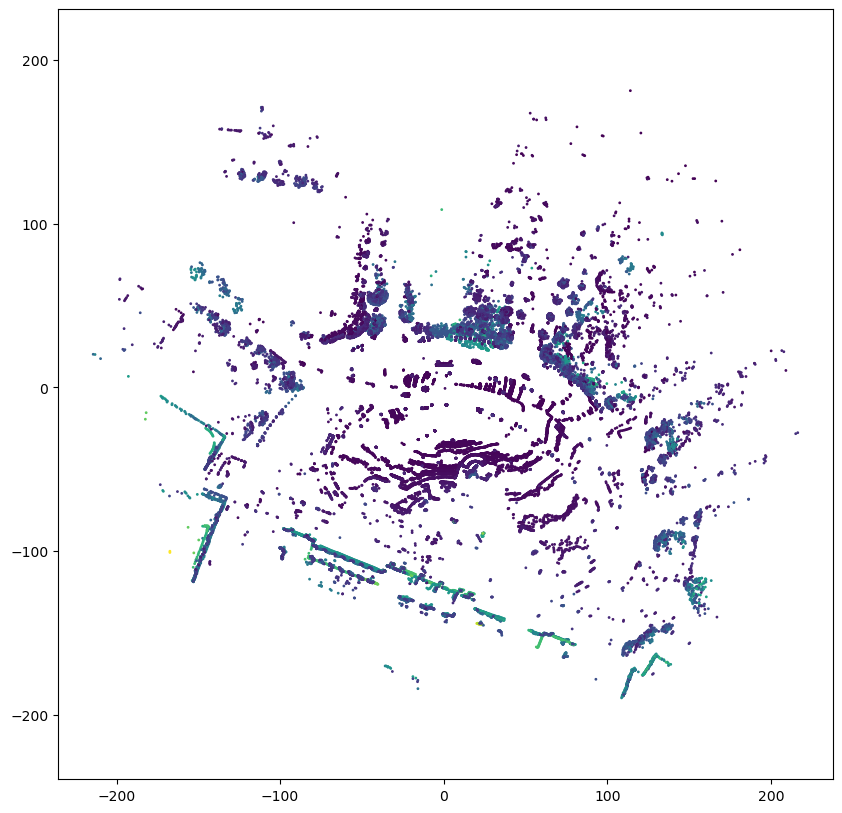

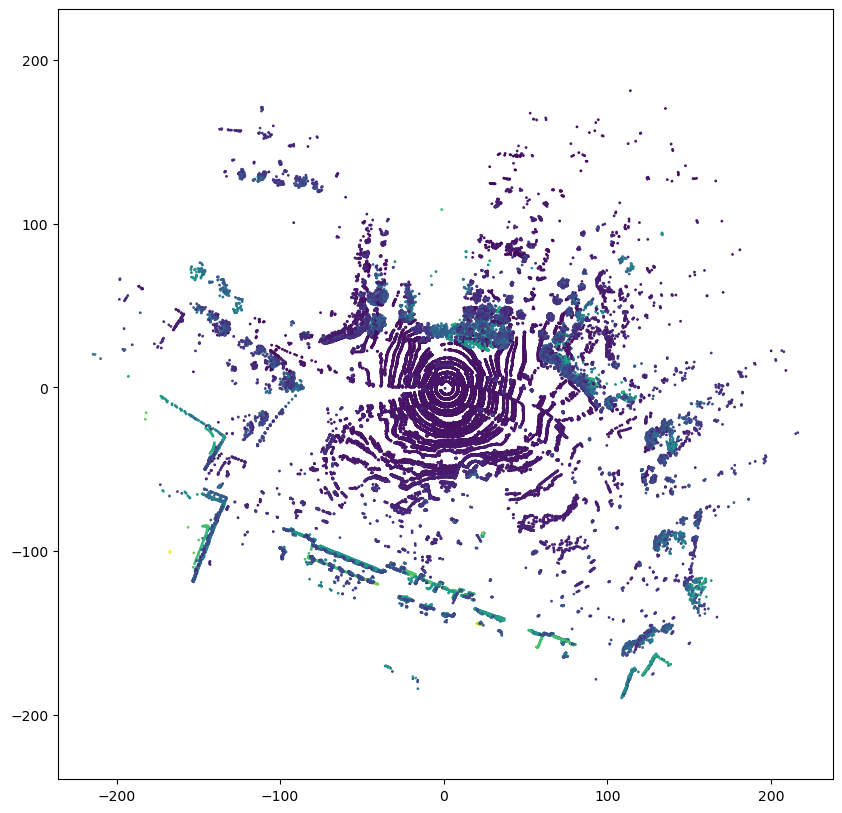

In [6]:
from prototype_utils import plot_bev

plot_bev(non_ground_points)
plot_bev(points)